In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from simulate_prices_gbm import simulate_gbm
from get_weights import get_weights

### Obtain GBM Simulation for assets prices

In [11]:
# weights
risk_free_rate = 0.05
market_return = 0.5

# Obtain historical prices
df = pd.read_csv('historical_prices.csv')
# Run GBM simulation
T = 1
dt = 1/365
prices_gbm = simulate_gbm(df, T, dt)


### Obtain returns lists

In [12]:
# Obtain returns lists
returns = prices_gbm.pct_change()
eth = prices_gbm['ETH']
eth_returns = eth.pct_change()

returns = returns.replace([np.nan, np.inf, -np.inf], 0)
eth_returns = eth_returns.replace([np.nan, np.inf, -np.inf], 0)

### Get min variance optimiation weights and max sharpe weights

In [13]:
# Get weights
weights = get_weights(risk_free_rate, market_return, prices_gbm)
min_variance_weights = weights['Min Weight']
max_sharpe_weights = weights['Max Weight']

# Extract non zero weight assets
filtered_max_sharpe= weights[weights['Max Weight'] != 0]
# Create a sub-dictionary with non-zero values
filtered_dict = dict(zip(filtered_max_sharpe['Names'], filtered_max_sharpe['Max Weight']))


print(filtered_dict)

{'WIF': 1.0}


### Run a simulation of portfolio assets vs eth

In [14]:
# Calculate total weighted assets
portfolio_sum = 0

for key, value in filtered_dict.items():
    portfolio_sum += returns[key] * value

portfolio_sum = portfolio_sum.fillna(0) 
eth_returns = eth_returns.fillna(0) 

# Simulate portfolio returns
n = len(eth_returns.index)
portfolio_eth = np.zeros(n)
portfolio_assets = np.zeros(n)
v0 = 1000
portfolio_eth[0] = v0
portfolio_assets[0] = v0


for i in range (1, n):
    portfolio_eth[i] = (1+eth_returns[i-1])*portfolio_eth[i-1]
    portfolio_assets[i] = (1+portfolio_sum[i-1])*portfolio_assets[i-1]

### Plot results

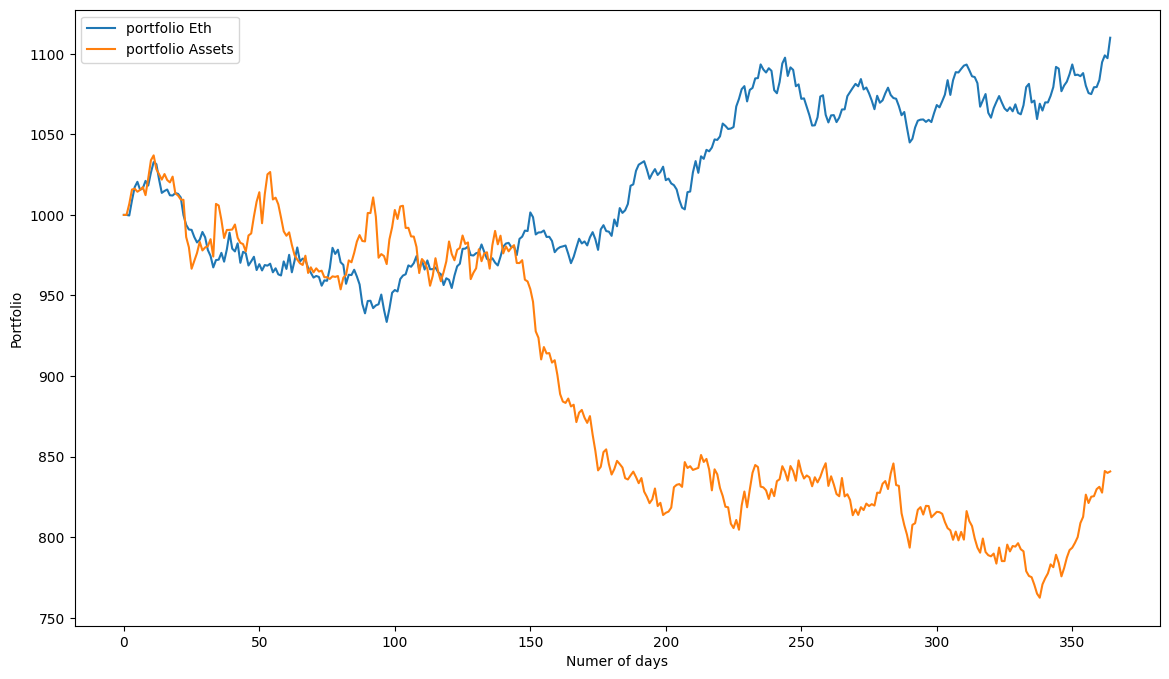

In [15]:
# Plot
plt.figure(figsize=(14, 8))
plt.plot(portfolio_eth , label='portfolio Eth')
plt.plot(portfolio_assets , label='portfolio Assets')
plt.legend()
plt.xlabel('Numer of days')
plt.ylabel('Portfolio')
plt.show()